# Machine Learning

## Car Mileage Prediction above Median of all Cars

##### There are 397 models of cars. (Note: displacement is measured in ft-lb, horsepower in hp, weight in lbs, and acceleration in seconds to go from from 0 to 60 mph.)

### Overview:
1. exploratory data analysis to determine some candidate variables that seem associated with gas mileage (mpg01) and could be useful in modeling mpg01. 
2. Build a logistic regression model to predict whether or not a car achieves a gas mileage above the median gas mileage of all cars in the dataset. 
3. Compute the fraction of correct predictions out of the total (the test error rate).
4. Can we achieve a better test error rate using a different probability threshold than the one in 3? 

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [33]:
cars = pd.read_csv("MoreCars.csv")
cars.head()



,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [34]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


## I noticed horsepower is not int dtype and we have to convert it to int so we can perfrom calculations.


In [4]:
cars["horsepower"] = cars["horsepower"].apply(pd.to_numeric, errors='coerce')

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


### Lets cast all columns to look for patterns



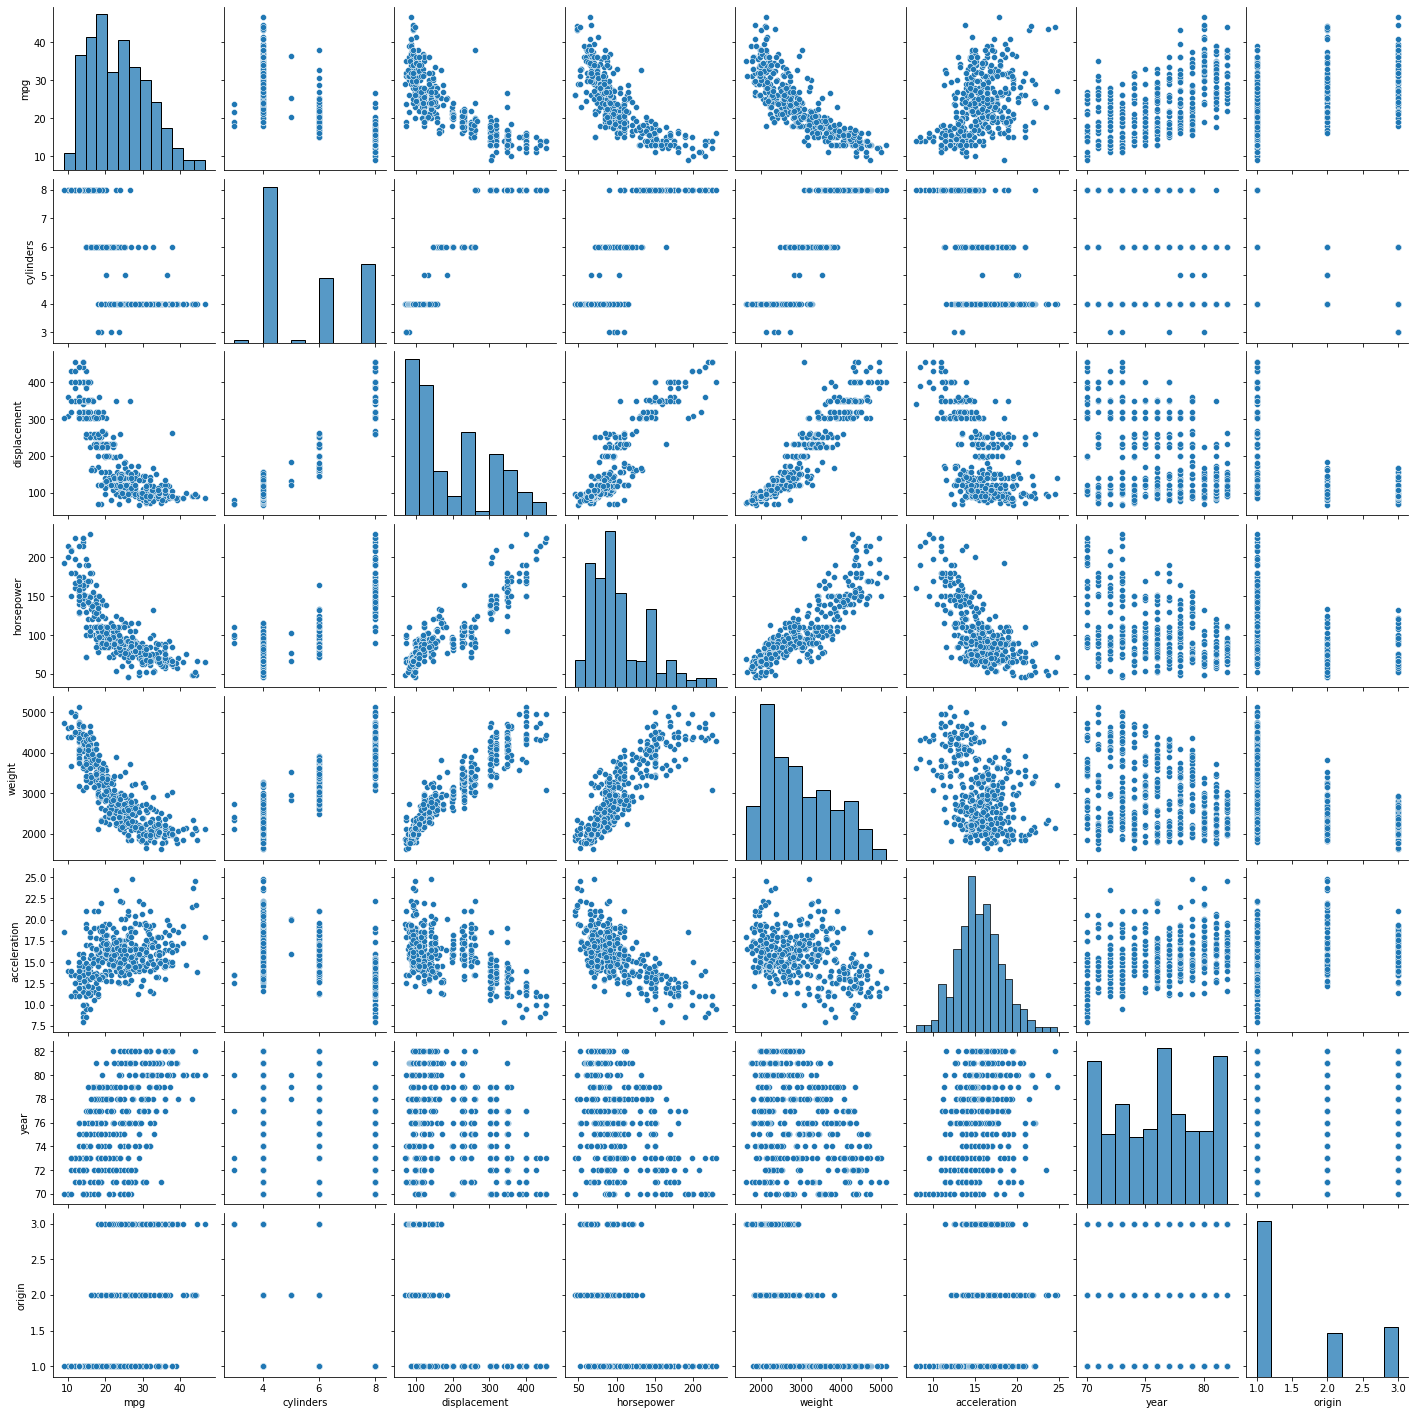

In [7]:
sns.pairplot(cars,
             x_vars = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']
            )


### **Ananlysis**: In the initial view of the scatter plots, we can see (cylinders,displacement, weight, horsepower) are negativly corralated and (year, origin) are slightly positive correlated.
### We can notice that mpg has negative correlation with weight and displacement. 
### To clearly state the correlation, the lower mpg, the higher (cylinders, displacement, weight, horsepower). We do not see any correlation in accelerator

In [8]:
cars.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


### Logistic Regression Model
first we will split the data into two dataset based on years since we are predicting mpg with weight and displacement 


Now we categorize if each car mpg is higher than its median or not by converting to 1 and 0 to build the logistic modeling.

In [9]:
mpg_median = cars.mpg.median()

print('The mpg median is: '+ str(mpg_median))


The mpg median is: 23.0


In [10]:
car_t = np.where(cars.mpg > mpg_median, 1, 0)
cars.insert(1,"mpg_median",car_t)


In [11]:
cars


,mpg,mpg_median,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...,...
392,27.0,1,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,1,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,1,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,1,4,120.0,79.0,2625,18.6,82,1,ford ranger


### We will take 70% for training and 30% for testing. 
we want to predict the dataset by the test dataset which did not see yet.

In [12]:
cars.mpg_median.value_counts()


0    206
1    191
Name: mpg_median, dtype: int64

In [13]:
# get 70% of the dataset for training
car_train = np.random.rand(len(cars)) < .7
cars_train = cars[car_train]
# get 30% of the dataset for testing
cars_test = cars[~car_train]


In [14]:
cars_train.shape


(261, 10)

In [15]:
cars_test.shape

(136, 10)

In [16]:
car_large_model = smf.logit(formula='mpg_median ~ cylinders+displacement+weight+acceleration+year+origin+horsepower',
                          data=cars_train).fit()


Optimization terminated successfully.
         Current function value: 0.151434
         Iterations 10


In [17]:
car_large_model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             mpg_median   No. Observations:                  258
Model:                          Logit   Df Residuals:                      250
Method:                           MLE   Df Model:                            7
Date:                Thu, 14 Oct 2021   Pseudo R-squ.:                  0.7815
Time:                        02:49:41   Log-Likelihood:                -39.070
converged:                       True   LL-Null:                       -178.80
Covariance Type:            nonrobust   LLR p-value:                 1.462e-56
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -44.0499     10.997     -4.005      0.000     -65.604     -22.495
cylinders       -0.0160      0.595     -0.027      0.979      -1.181       1.149
displacement     0.0324      0.019      1.696      0.090      -0.005       0.070
weight          -0.0093      0.002     -3.830      0.000      -0.014      -0.005
acceleration     0.0174      0.213      0.082      0.935      -0.400       0.435
year             0.8998      0.187      4.808      0.000       0.533       1.267
origin           1.7730      0.579      3.063      0.002       0.639       2.908
horsepower      -0.0734      0.040     -1.847      0.065      -0.151       0.004
================================================================================

Possibly complete quasi-separation: A fraction 0.36 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Analysis: 
#### The model shows  Log-Liklihood and p values has a very significatn and non significant probability. We need to take out some variables to test how the model will look like with different variables. We will start removing some variable that has low signigicatn in p value to see if we notice any improvments on the model. 




In [18]:
car_small_model = smf.logit(formula='mpg_median ~ weight+year+horsepower', 
                            data=cars_train).fit()
car_small_model.summary()


Optimization terminated successfully.
         Current function value: 0.176181
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             mpg_median   No. Observations:                  258
Model:                          Logit   Df Residuals:                      254
Method:                           MLE   Df Model:                            3
Date:                Thu, 14 Oct 2021   Pseudo R-squ.:                  0.7458
Time:                        02:49:46   Log-Likelihood:                -45.455
converged:                       True   LL-Null:                       -178.80
Covariance Type:            nonrobust   LLR p-value:                 1.603e-57
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.3312      7.559     -3.880      0.000     -44.147     -14.515
weight        -0.0058      0.001     -5.645      0.000      -0.008      -0.004
year           0.6383      0.125      5.123      0.000       0.394       0.883
horsepower    -0.0345      0.021     -1.670      0.095      -0.075       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.19 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### I noticed displacement, cylinders and origin are very bad for the model and they do not contributed greatly to fit the model, so I have to remove them. I tried to lower the Log-Liklihood by removing low significant p value. However, that did not show any improvement in the model.Also, the Pseudo R-squared is higher when all variables are included. Now we will compare the difference of our models to see the LLF differnece which in fact adding all the models together are better off than taking variables.






#### Lower Log-Likelihood = better model
#### Higher R-Pseudo = better model



## Model Comparison:
car_large_model has more variables \
car_small_model has less variables




In [19]:
print("The Log-Likelihood for Large Model:" + str(car_large_model.llf))
print("The Log-Likelihood for Small Model:" + str(car_small_model.llf))




The Log-Likelihood for Large Model:-39.06989305982089
The Log-Likelihood for Small Model:-45.454784899183394


In [20]:
stat=2*(car_large_model.llf-car_small_model.llf)
diff_llf = 1-stats.chi2.cdf(stat,1)
print("The difference between the two Models is: "+ str(diff_llf))



The difference between the two Models is: 0.0003522635718685718


We see a slighly difference in the model of log-liklihood and we will keep all variables since its adding values to the model and yet keeps it lower in log-liklihood


Lets predict the cars_test from the Large Model


In [21]:
col_pred = [ 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration', 'year', 'origin']


In [22]:
car_testCopy = cars_test.copy()
car_testCopy['predicted_prob'] = car_large_model.predict(cars_test[col_pred])

threshold = 0.5
car_testCopy['prediction'] = np.where(car_testCopy['predicted_prob'] >= threshold, 1, 0 )
car_prediction = car_testCopy[['mpg', 'mpg_median', 'predicted_prob', 'prediction']]
car_prediction



,mpg,mpg_median,predicted_prob,prediction
1,15.0,0,6.864623e-07,0
2,18.0,0,7.838842e-06,0
8,14.0,0,2.795010e-10,0
9,15.0,0,8.885244e-08,0
12,15.0,0,5.381622e-06,0
...,...,...,...,...
378,36.0,1,9.999587e-01,1
382,38.0,1,9.999997e-01,1
388,22.0,0,9.910282e-01,1
393,44.0,1,9.999982e-01,1


### prediction_prob is the probability of being in any group so we have to classify a thresholding on which probability is above median or lower


In [23]:
cross_median = pd.crosstab(car_prediction['mpg_median'],car_prediction['prediction'])
cross_median =cross_median.rename(index={0:"lower", 1:'above'}, columns={0:'fail', 1:'success'})
cross_median['total'] = cross_median.sum(axis=1)
cross_median.loc['total'] = cross_median.sum()



In [24]:
cross_median


prediction,fail,success,total
mpg_median,,,
lower,71,8,79
above,8,49,57
total,79,57,136


In [25]:
print("The total rate of correct prediction is: " \
      +str((cross_median.iloc[1][1]+cross_median.iloc[0][0])/((cross_median.iloc[2][2])))+" with threshold of "\
      +str(threshold))



The total rate of correct prediction is: 0.8823529411764706 with threshold of 0.5


In [26]:
success_above = cross_median.iloc[1][1]/cross_median.iloc[1][0]
success_lower = cross_median.iloc[0][1]/cross_median.iloc[0][0]
the_odds_ratio = success_lower/success_above


print("The Odd of success for above Median: " \
      +str(success_above)+ " with threshold of: " + str(threshold))

print("The Odd of success for lower Median: " \
      +str(success_lower) + " with threshold of: " + str(threshold))
print("The Odds Ratio of success for both higher and lower is "+str(the_odds_ratio))





The Odd of success for above Median: 6.125 with threshold of: 0.5
The Odd of success for lower Median: 0.11267605633802817 with threshold of: 0.5
The Odds Ratio of success for both higher and lower is 0.018396090830698476


### Analysis: We have a very high prediction rate. it seems that we got a very higher prediction in median for a car to achieve mpg higher than median where our theshhold is .5.



# Senstivity Analysis

#### Lets do a sensetivity analysis on prediction by changing thresholds with higher and lower than the base

In [27]:

# higher thresholding
threshold_high = 0.9
car_testCopy['prediction_higher'] = np.where(car_testCopy['predicted_prob'] >= threshold_high, 1, 0)

# lower thresholding
threshold_low = 0.1
car_testCopy['prediction_lower'] = np.where(car_testCopy['predicted_prob'] >= threshold_low, 1, 0)
car_prediction = car_testCopy[['mpg', 'mpg_median', 'predicted_prob', 'prediction','prediction_higher', 'prediction_lower']]
car_prediction


,mpg,mpg_median,predicted_prob,prediction,prediction_higher,prediction_lower
1,15.0,0,6.864623e-07,0,0,0
2,18.0,0,7.838842e-06,0,0,0
8,14.0,0,2.795010e-10,0,0,0
9,15.0,0,8.885244e-08,0,0,0
12,15.0,0,5.381622e-06,0,0,0
...,...,...,...,...,...,...
378,36.0,1,9.999587e-01,1,1,1
382,38.0,1,9.999997e-01,1,1,1
388,22.0,0,9.910282e-01,1,1,1
393,44.0,1,9.999982e-01,1,1,1


In [28]:
cross_median



prediction,fail,success,total
mpg_median,,,
lower,71,8,79
above,8,49,57
total,79,57,136


In [29]:
# higher threshold
cross_median2 = pd.crosstab(car_prediction['mpg_median'],car_prediction['prediction_higher'])
cross_median2 =cross_median2.rename(index={0:"lower", 1:'above'}, columns={0:'fail', 1:'success'})
cross_median2['total'] = cross_median2.sum(axis=1)
cross_median2.loc['total'] = cross_median2.sum()
print("Higher Threshold Result\n")
cross_median2



Higher Threshold Result



prediction_higher,fail,success,total
mpg_median,,,
lower,74,5,79
above,15,42,57
total,89,47,136


In [30]:
#lower theshold
cross_median3 = pd.crosstab(car_prediction['mpg_median'],car_prediction['prediction_lower'])
cross_median3 =cross_median3.rename(index={0:"lower", 1:'above'}, columns={0:'fail', 1:'success'})
cross_median3['total'] = cross_median3.sum(axis=1)
cross_median3.loc['total'] = cross_median3.sum()
print("Lower Threshold Result\n")
cross_median3

Lower Threshold Result



prediction_lower,fail,success,total
mpg_median,,,
lower,61,18,79
above,5,52,57
total,66,70,136


In [31]:
print("The total rate of correct prediction is: " \
      +str((cross_median3.iloc[1][1]+cross_median3.iloc[0][0])/((cross_median3.iloc[2][2])))+" with threshold of "\
      +str(threshold_low))


print("The total rate of correct prediction is: " \
      +str((cross_median.iloc[1][1]+cross_median.iloc[0][0])/((cross_median.iloc[2][2])))+" with threshold of "\
      +str(threshold))


print("The total rate of correct prediction is: " \
      +str((cross_median2.iloc[1][1]+cross_median2.iloc[0][0])/((cross_median2.iloc[2][2])))+" with threshold of "\
      +str(threshold_high))






The total rate of correct prediction is: 0.8308823529411765 with threshold of 0.1
The total rate of correct prediction is: 0.8823529411764706 with threshold of 0.5
The total rate of correct prediction is: 0.8529411764705882 with threshold of 0.9


### Analysis: I have set the sensitive analysis +-4 from the base and as you can see above, I have higher prediction if I have threshold on 0.5. it seems if I decreased or increase the threshold the prediction is decreasing. one thing to notice that if we set threshold to 0.5,0.6,0.7, we get same outcome
